# Gradient of Matrices

Recall that we previously fit a regression model y=mx+b to predict domestic gross sales from a movies budget.  
Expanding this example, we can imagine being in charge of managing a large production and we might want to figure out what other factors (such as the actors, director, genre, running length or other features) were most predictive of the movie's success in the box office.

Here gradient descent is slightly more complicated as we're dealing with the multivariate case. As a result, we can take the derivative (or gradient) with respect to different variables. The underlying intuition is that we want to move in the direction of the steepest descent in hopes that we can find the global minimum. We then do this through a series of successive steepest steps forward until we are satisfied with the result.

### 1. Import the data. It's stored in a file called 'movie_data_detailed_with_ols.xlsx'.

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_excel('movie_data_detailed_with_ols.xlsx')
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


### 2. Scatter Plot <a id="scatter"></a>  
Create a Scatter Plot of the budget and  Domestic Gross (domgross) along with the model column's predictions.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

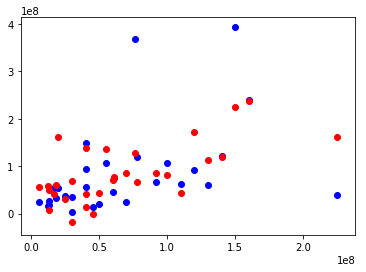

In [4]:
plt.scatter(df.budget, df.domgross, color='blue')
plt.scatter(df.budget, df['Model'], color='red')

As you can see, we get far better results then a simple straight line! Let's start to further investigate how this happens under the hood.

Gradient Descent works by finding the steepest slope downhill and taking a step in that direction.  
From there, you then iterate and take another step in the steepest direction from that point.  
This continues on until you converge on a minimum solution.

To write our gradient descent algorithm, we'll need a few things:
- An array of [coefficient] weights for the polynomial model. 
- An error function to evaluate the current iteration's model.
- A specified step size coefficient
- A precision parameter

## 3. Define the problem.
Create an X (multidimensional) and Y variable.

In [5]:
X = df[['budget', 'imdbRating',
       'Metascore', 'imdbVotes']]
y = df['domgross']

### 4.  Predicting!  
**Create a function predict(X,w) that takes in a matrix of data and a vector of coefficient weights and returns a vector of predicted values.**

$x_1\bullet w_1 + x_2\bullet w_2 + x_3\bullet w_3 + ... = y_1+y_2+y_3+...$

In [6]:
def predict(X, w, b=False):
    """Takes in a matrix X of features, and w,
    a vector of coefficients for how much each feature is weighed in the current model.
    w[-1] is the constant additive value by default. To remove this feature specify b=False."""
    if b:
        y_hat = np.dot(X, w[:-1])+w[-1] #Multiply coefficient weights by data matrix and add constants
        return y_hat
    else:
        y_hat = np.dot(X, w) #No constant term. Simply mulitply coefficient weights and data.
        return y_hat

### 5. Write an error function to calculate the residual sum of squares for a given model.  
Your function should take in 3 inputs:
 * a list of x values
 * a list of y values (corresponding to the x values passed)
 * a list of $\hat{y}$ values produced by the model (corresponding to the x values passed)

In [7]:
def rss(y, y_hat):
    return sum((y_hat - y)**2)

rss(df['domgross'], df['Model'])

1.4298086041804125e+17

### 6. Gradient Descent, take 2!

Here's a pseudocode outline:  

* Initialize a vector of weights for your model.
* Then calculate the error for this model using the RSS.
* From there, calculate the gradient at this point. 
* Use the gradient along with your step size coefficient to update your vector of weights.
* Iterate! Continue this process until the model converges to an arbitrary precison.  

Okay then, let's have at it!  
**Define a function grad_desc() that takes in 7 parameters (shown below) and returns a vector of optimized coefficients for the model.**
* X #Matrix of Data
* Y #Variable interested in modelling
* Precision
* Max Iterations
* Initialization Vector (Initial weights to start the algorithm at)
* An error/loss function (Ultimately this is how we measure the effectiveness of our optimization)
* A prediction function (This function should take your function weights along with the original data and return predictions; see the previous question)

**Have your function print updated weights every so often so you can preview what's going on under the hood.**

In [8]:
import numpy as np

In [9]:
def grad_desc(x, y, precision, max_iters, w, rss, predict):
    previous_step_size = 1 #Arbitrary
    iteration = 0 #iteration counter
    while (previous_step_size > precision) & (iteration < max_iters):
        if iteration%500==0:
            print('Iteration {} \nCurrent weights:\n{} \nRSS Produced: {}'.format(iteration, w, rss(y, predict(X, w))))
            print('\n\n')
        #Calculate Nearby Points
        sample_steps = np.array(w)/1000.0 #Take mean of feature weights and divide by 100. /
                                                #Use this to create surrounding sample points.
        #Calculate the Gradient
        #Look at weights surrounding our current position.
        weights_sample_space = np.array([w+(i*sample_steps) for i in range(-50,51)])

        #Calculate the RSS error for this surrounding weights-space.
        y_hats = np.array([predict(X, wi) for wi in weights_sample_space])
        rss_weights_sample_space = np.array([rss(y, y_hat) for y_hat in y_hats])

        #weights_and_y_hats = np.concatenate((weights_sample_space,  np.array([rss_weights_sample_space]).T), axis=1)
        gradients = np.gradient(rss_weights_sample_space)
        steepest_gradient_idx = max(list(enumerate(gradients)), key=lambda x: x[1])[0]


        #Move opposite the gradient by some step size
        prev_w = w #Save for calculating how much we moved
        w = w - alpha*weights_sample_space[steepest_gradient_idx]

        previous_step_size = np.sqrt(sum([wi**2 for wi in w-prev_w]))
        iteration += 1
    

    print("Gradient descent converged. Local minimum identified at:")
    print('Iteration {} \nCurrent weights:\n{} \nRSS Produced: {}'.format(iteration, w, rss(y, predict(X, w))))
    return w

### 7. Try Running Your New Function
Use your new function to train a regression model.

In [10]:
w = [ 5.72229253e-01, -6.01610423e+04, -1.92223233e+06,  4.04048376e+05]
alpha = .01 # step size multiplier
precision = 0.000001
previous_step_size = 1 
max_iters = 10000 

In [11]:
grad_desc(X, y, precision, max_iters, w, rss, predict)

Iteration 0 
Current weights:
[0.572229253, -60161.0423, -1922232.33, 404048.376] 
RSS Produced: 2.474751063846404e+23



Iteration 500 
Current weights:
[ 2.92058148e-03 -3.07053904e+02 -9.81081640e+03  2.06220880e+03] 
RSS Produced: 4.4198863962379034e+18



Iteration 1000 
Current weights:
[ 1.49062568e-05 -1.56716201e+00 -5.00730932e+01  1.05252376e+01] 
RSS Produced: 4.6344509436464934e+17



Iteration 1500 
Current weights:
[ 7.60795385e-08 -7.99858502e-03 -2.55566362e-01  5.37194032e-02] 
RSS Produced: 4.7605083000759885e+17



Iteration 2000 
Current weights:
[ 4.03778855e-10 -4.24510922e-05 -1.35637381e-03  2.85106345e-04] 
RSS Produced: 4.761160090541675e+17



Gradient descent converged. Local minimum identified at:
Iteration 2264 
Current weights:
[ 2.95092081e-11 -3.10243614e-06 -9.91273226e-05  2.08363126e-05] 
RSS Produced: 4.761163314317698e+17


array([ 2.95092081e-11, -3.10243614e-06, -9.91273226e-05,  2.08363126e-05])

## 8. Use the coefficient weights from your model and create a new column 'Predictions' using your predict function.

In [15]:
w = [ 2.95092081e-11, -3.10243614e-06, -9.91273226e-05,  2.08363126e-05]
df['Predictions'] = predict(X, w, b=False)

### 9. Scatter Plot <a id="scatter"></a>  
Create a Scatter Plot of the budget and  Domestic Gross (domgross) along with the model column's predictions and those of your new model.

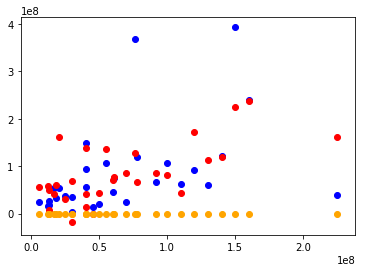

In [16]:
plt.scatter(df.budget, df.domgross, color='blue')
plt.scatter(df.budget, df['Model'], color='red')
plt.scatter(df.budget, df['Predictions'], color='orange')